## This Project contains two sections


## Section A
Involves analysis of data from an Indian Company to know:<br>
(1) The gender with more purchasing power<br>
(2) The age bracket of customers with the highest purchasing power<br>
(3) The state most of the orders come from<br>
(4) The marital status of buyers with high purchasing power<br>
(5) The occupation of customers with high purchasing power<br>
(6) The most sold products<br>

## Section B
This section involves part of my work during my internship at Herrenknecht AG, where I analyzed data from our excavation site in Singapore to write a geoscientific report about the subsurface based on the shape of the plots.


## Section A

In [36]:

# importing relevant python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [37]:
# importing the data 
df = pd.read_csv('Data.csv', encoding= 'unicode_escape')

In [38]:
df.shape

(11251, 15)

In [39]:
#Checking the head of the data before any analysis
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
## Checking Column type

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [87]:
#droping unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [88]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [89]:
# droping null values
df.dropna(inplace=True)

In [90]:
# changing data type of amount from float to int
df['Amount'] = df['Amount'].astype('int')

In [91]:
df['Amount'].dtypes

dtype('int32')

In [92]:
## Checking the columns to make sure they are all complete
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [168]:
#rename column to make it more comprehensive
df.rename(columns= {'Cust_name':'Customer_Name'})

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [105]:
# Using the describe() method to return description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [106]:
# using describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis (EDA) of section A
## Age

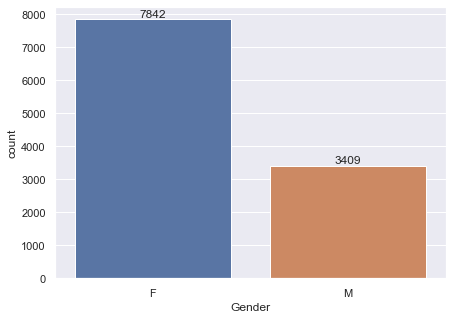

In [164]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

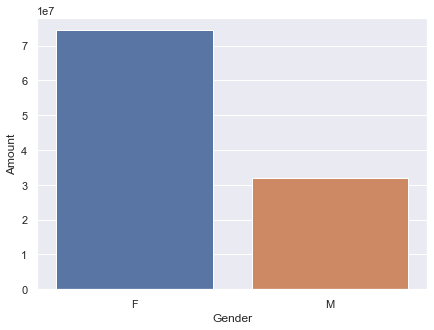

In [165]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.show()

The graphs above show that most consumers are women, and that women also have greater purchasing power than men.

## Age

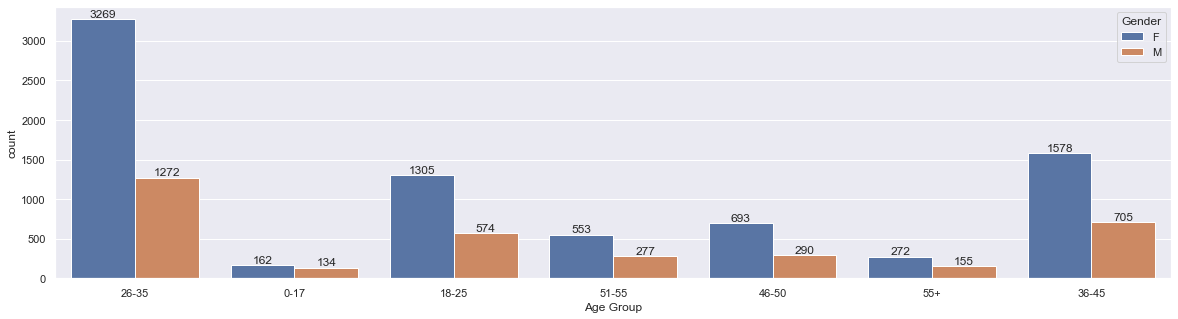

In [132]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

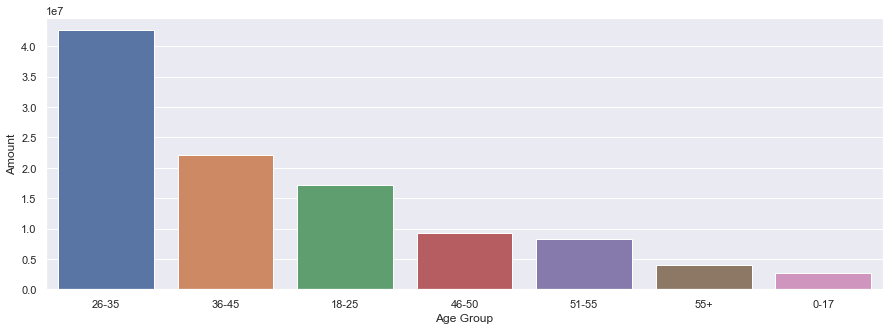

In [123]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.show()

According to the above graphs, the majority of buyers are females between the ages of 26 and 35.

## Sate

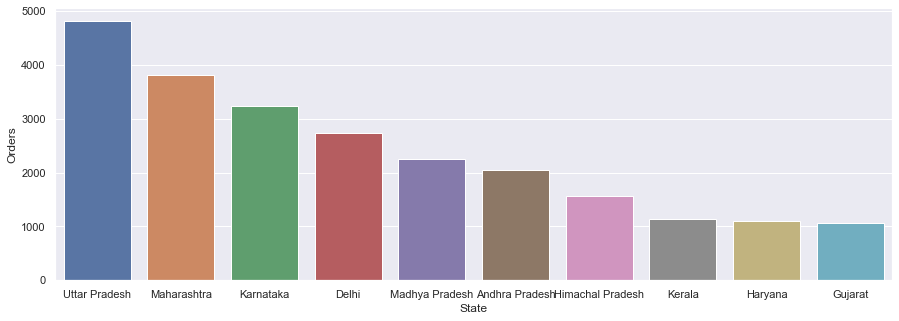

In [124]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.show()

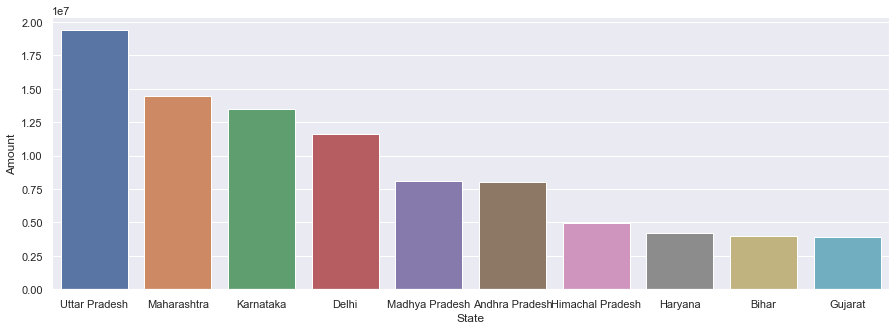

In [125]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.show()

According to the graphs above, Uttar Pradesh, Maharashtra, and Karnataka account for the majority of orders and the majority of overall sales, respectively.

## Marital Status

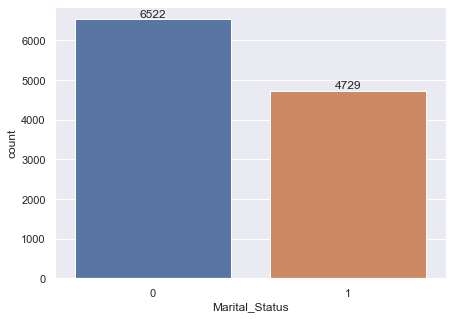

In [163]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

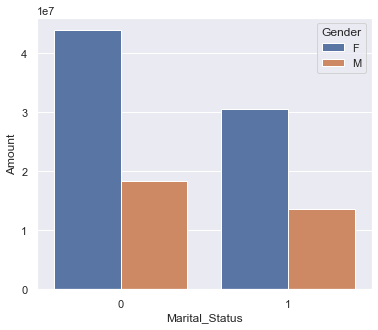

In [161]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

The figures above show that most customers are married women with high purchasing power.



## Occupation

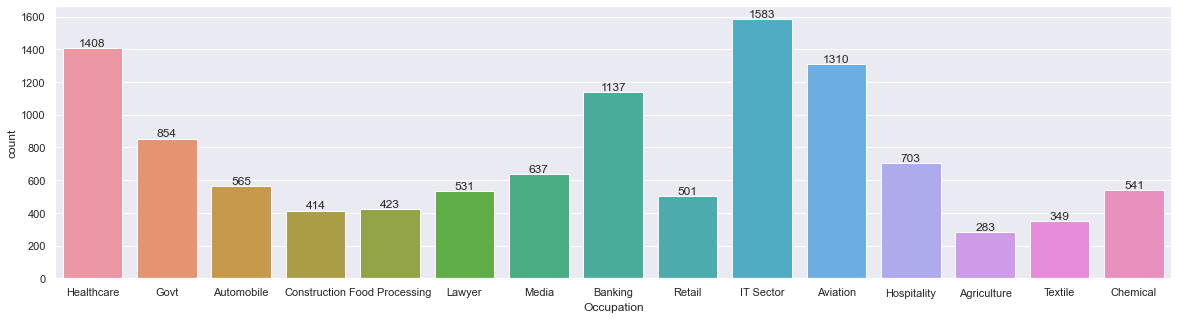

In [138]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

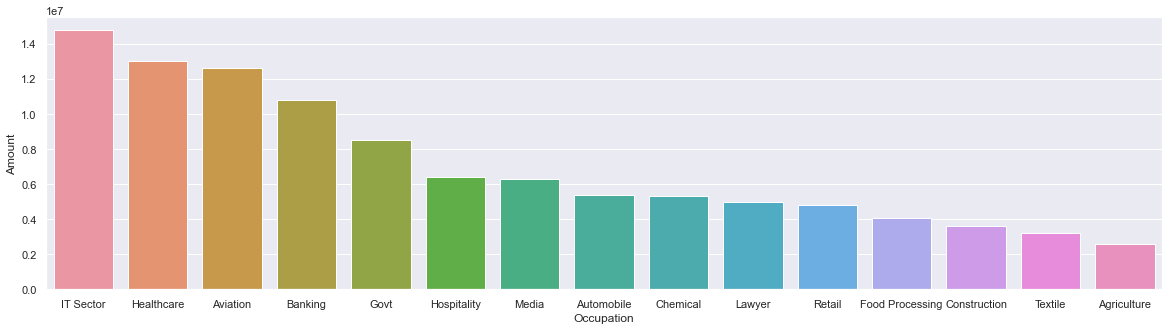

In [140]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.show()

The graphs above show that the majority of buyers are employed in the information technology, healthcare, and aviation sectors.



## Product Catergory

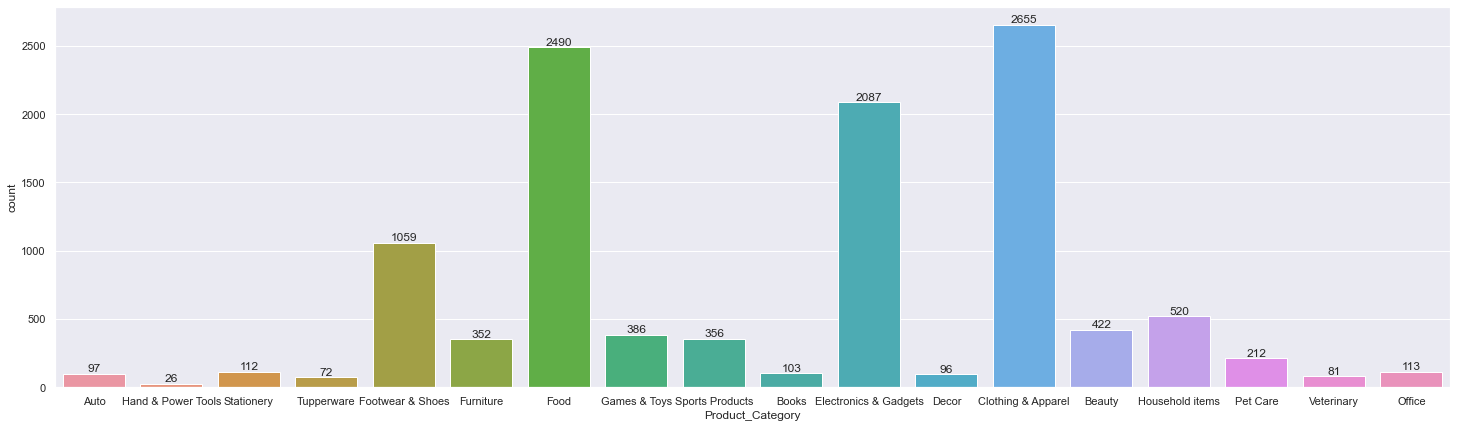

In [148]:
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

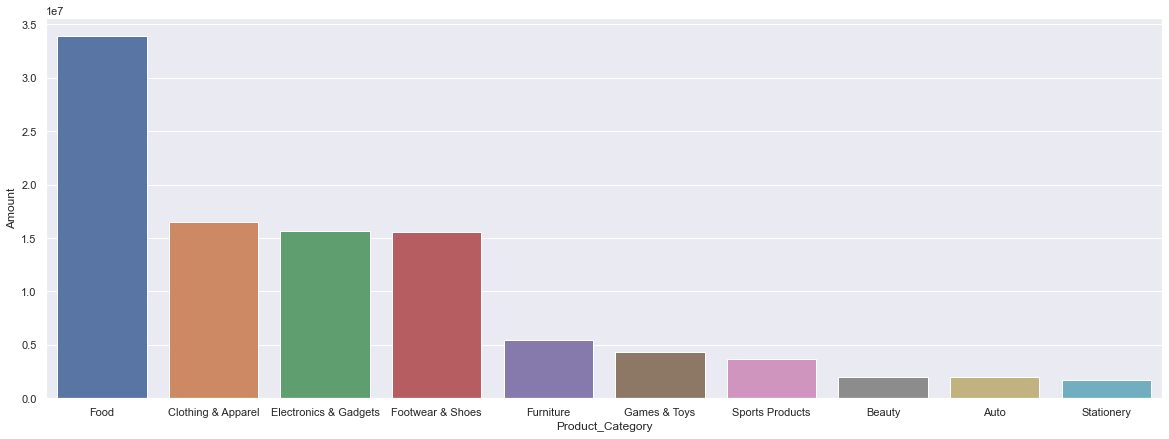

In [151]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.show()

The graphs above show that the categories of food, clothing, and electronics account for the majority of sales of products.


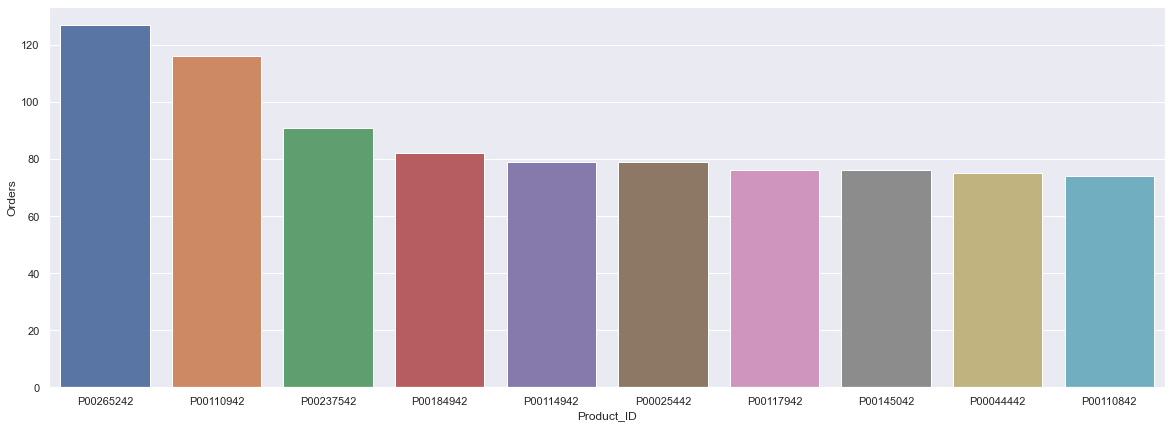

In [154]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()

## Conclusion






Married women in the 26-35 age range from the states of Uttar Pradesh, Maharashtra, and Karnataka who work in the IT, healthcare, and aviation industries are more likely to purchase items from the food, clothing, and electronics categories.



## Section B (Part of my work as an intern at Herrenknecht AG)

In [169]:

# importing relevant python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [174]:
# Setting the figure size
plt.rcParams["figure.figsize"]=[15,6]

In [3]:
#Importing the Excel data
df1 = pd.read_excel("sin1.xlsx")
df2 = pd.read_excel("sin2.xlsx") 


In [4]:
#Joining the two Excel data together
cdf = pd.DataFrame()
cdf = pd.concat([cdf,df1], ignore_index=True)
cdf = pd.concat([cdf,df2], ignore_index=True)


In [5]:
#Converting the Excel data to CSV format to fasten the loading process (CSV files load faster than Excel files)
cdf.to_csv('joined_dataset.csv', index=False)

In [170]:
cdf = pd.read_csv("joined_dataset.csv")

In [171]:
# Checking the head of the data
cdf.head()

,ts(Asia/Singapore),Chainage_1,IDV_Bi_component_B_position_specification_stop,IDV_Main_drive_advance_average_specific_energy,IDV_Main_drive_advance_X10_X01_average_specific_energy,QDV_Advance_speed,QDV_Bi_component_Excavation_chamber_pressure,QDV_Bulkhead_temperature_01,QDV_Bulkhead_temperature_02,QDV_Bulkhead_temperature_03,...,QDV_Excavation_chamber_pressure_04,QDV_Excavation_chamber_pressure_05,QDV_Excavation_chamber_pressure_06,QDV_Excavation_chamber_pressure_07,QDV_Excavation_chamber_pressure_08,QDV_Excavation_chamber_pressure_09,QDV_Excavation_chamber_pressure_10,QDV_Main_drive_specific_energy,QDV_Main_drive_torque,QDV_Screw_conveyor_torque
0,2022-04-01 00:00:05,2542,1600,0,0.0,0.0,0.0,29,29,28,...,0.01,0.01,0.0,0.02,0.01,0.02,0.0,0,0.0,0
1,2022-04-01 00:00:10,2542,1600,0,0.0,0.0,0.0,29,29,28,...,0.01,0.01,0.0,0.02,0.01,0.02,0.0,0,0.0,0
2,2022-04-01 00:00:15,2542,1600,0,0.0,0.0,0.0,29,29,28,...,0.01,0.01,0.0,0.02,0.01,0.02,0.0,0,0.0,0
3,2022-04-01 00:00:20,2542,1600,0,0.0,0.0,0.0,29,29,28,...,0.01,0.01,0.0,0.02,0.01,0.02,0.0,0,0.0,0
4,2022-04-01 00:00:25,2542,1600,0,0.0,0.0,0.0,29,29,28,...,0.01,0.01,0.0,0.02,0.01,0.02,0.0,0,0.0,0


In [34]:
# Checking the data type of the column
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261440 entries, 0 to 1261875
Data columns (total 26 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   ts(Asia/Singapore)                                      1261440 non-null  object 
 1   Chainage_1                                              1261440 non-null  int64  
 2   IDV_Bi_component_B_position_specification_stop          1261440 non-null  int64  
 3   IDV_Main_drive_advance_average_specific_energy          1261440 non-null  int64  
 4   IDV_Main_drive_advance_X10_X01_average_specific_energy  1261440 non-null  float64
 5   QDV_Advance_speed                                       1261440 non-null  float64
 6   QDV_Bi_component_Excavation_chamber_pressure            1261440 non-null  float64
 7   QDV_Bulkhead_temperature_01                             1261440 non-null  int64  
 8   QDV_Bulkhead

In [32]:
#Checking the correlation between different columns for my scientific report
cdf.corr()

,Chainage_1,IDV_Bi_component_B_position_specification_stop,IDV_Main_drive_advance_average_specific_energy,IDV_Main_drive_advance_X10_X01_average_specific_energy,QDV_Advance_speed,QDV_Bi_component_Excavation_chamber_pressure,QDV_Bulkhead_temperature_01,QDV_Bulkhead_temperature_02,QDV_Bulkhead_temperature_03,QDV_Bulkhead_temperature_04,...,QDV_Excavation_chamber_pressure_04,QDV_Excavation_chamber_pressure_05,QDV_Excavation_chamber_pressure_06,QDV_Excavation_chamber_pressure_07,QDV_Excavation_chamber_pressure_08,QDV_Excavation_chamber_pressure_09,QDV_Excavation_chamber_pressure_10,QDV_Main_drive_specific_energy,QDV_Main_drive_torque,QDV_Screw_conveyor_torque
Chainage_1,1.000000,0.389558,-0.129820,0.334905,-0.071408,0.704744,-0.030045,-0.103944,-0.186830,-0.179682,...,0.683348,0.642490,0.643703,0.685184,0.713309,0.741899,0.780342,-0.129788,-0.124630,-0.124996
IDV_Bi_component_B_position_specification_stop,0.389558,1.000000,0.041867,-0.060512,0.071618,0.355920,0.302228,0.190336,0.139351,0.158890,...,0.340422,0.320184,0.330221,0.347063,0.359961,0.381547,0.399645,0.041824,0.069220,0.059711
IDV_Main_drive_advance_average_specific_energy,-0.129820,0.041867,1.000000,-0.025913,0.699750,0.043082,0.261941,0.252631,0.264279,0.253093,...,0.059120,0.080296,0.085001,0.060848,0.043444,0.018905,-0.019451,0.990319,0.793605,0.820726
IDV_Main_drive_advance_X10_X01_average_specific_energy,0.334905,-0.060512,-0.025913,1.000000,-0.035645,-0.045180,-0.203306,-0.173224,-0.243909,-0.228808,...,-0.065487,-0.086244,-0.079434,-0.070068,-0.051062,-0.027989,0.018661,-0.025844,-0.043203,-0.050885
QDV_Advance_speed,-0.071408,0.071618,0.699750,-0.035645,1.000000,0.062410,0.226891,0.207761,0.231643,0.218560,...,0.075936,0.096672,0.102951,0.077631,0.061332,0.038928,0.004298,0.699496,0.899916,0.869034
QDV_Bi_component_Excavation_chamber_pressure,0.704744,0.355920,0.043082,-0.045180,0.062410,1.000000,0.546364,0.467964,0.417527,0.416833,...,0.994991,0.990954,0.990152,0.994059,0.990340,0.990193,0.976426,0.043045,0.063846,0.063556
QDV_Bulkhead_temperature_01,-0.030045,0.302228,0.261941,-0.203306,0.226891,0.546364,1.000000,0.949717,0.921661,0.932270,...,0.569585,0.606201,0.613851,0.569070,0.534323,0.500057,0.432542,0.261838,0.296173,0.288129
QDV_Bulkhead_temperature_02,-0.103944,0.190336,0.252631,-0.173224,0.207761,0.467964,0.949717,1.000000,0.950270,0.953481,...,0.492030,0.536320,0.540098,0.487849,0.444517,0.407742,0.342428,0.252512,0.279086,0.273411
QDV_Bulkhead_temperature_03,-0.186830,0.139351,0.264279,-0.243909,0.231643,0.417527,0.921661,0.950270,1.000000,0.985377,...,0.434814,0.491920,0.494812,0.429472,0.378975,0.343079,0.283072,0.264127,0.299329,0.290065
QDV_Bulkhead_temperature_04,-0.179682,0.158890,0.253093,-0.228808,0.218560,0.416833,0.932270,0.953481,0.985377,1.000000,...,0.436551,0.489907,0.493520,0.431160,0.383056,0.346591,0.284905,0.252976,0.286816,0.280646


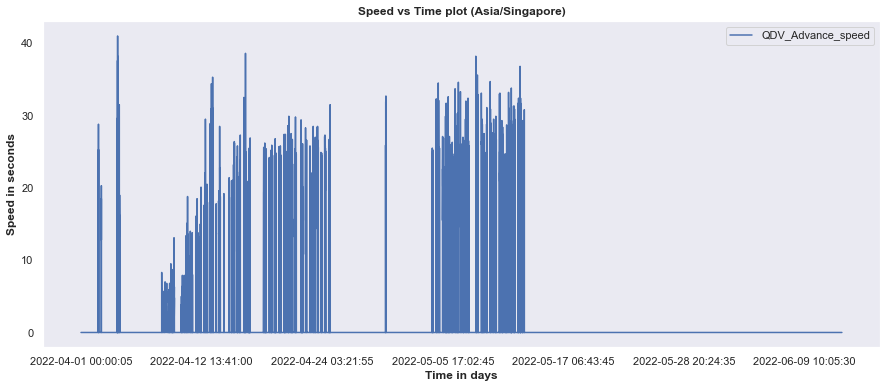

In [177]:
#Plotting the time against Speed of the TBM to know when the tunnel construction was in progress and when the worker were not working
cdf.plot(x='ts(Asia/Singapore)',y="QDV_Advance_speed")
plt.ylabel("Speed in seconds",fontweight='bold')
plt.xlabel("Time in days",fontweight='bold')
plt.title("Speed vs Time plot (Asia/Singapore)", fontweight="bold")
plt.grid()
plt.show()

The days the TBM's speed is 0 represent the machine's inactive days, which were primarily weekends and holidays.



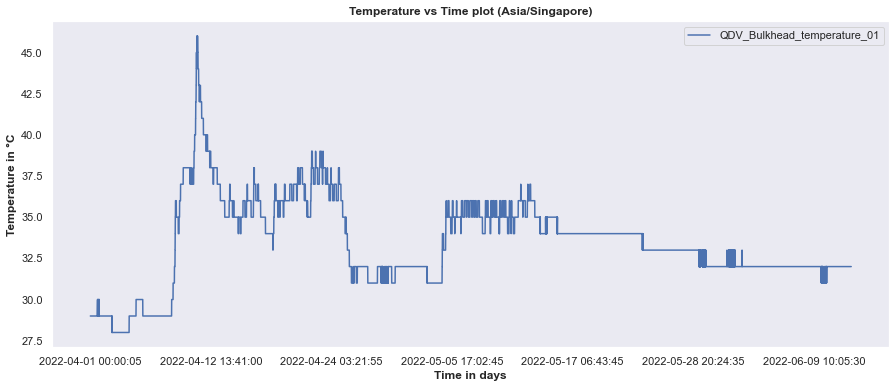

In [178]:

cdf.plot(x='ts(Asia/Singapore)',y="QDV_Bulkhead_temperature_01")
plt.ylabel("Temperature in °C",fontweight='bold')
plt.xlabel("Time in days",fontweight='bold')
plt.title("Temperature vs Time plot (Asia/Singapore)", fontweight="bold")
plt.grid()
plt.show()


The reading of the TBM temperature can be used to detect overheating of the cutting machine and also to check the days the machine is inactive . When the speed of the TBM is high, temperature of the TBM is expected to be high too vice versa.

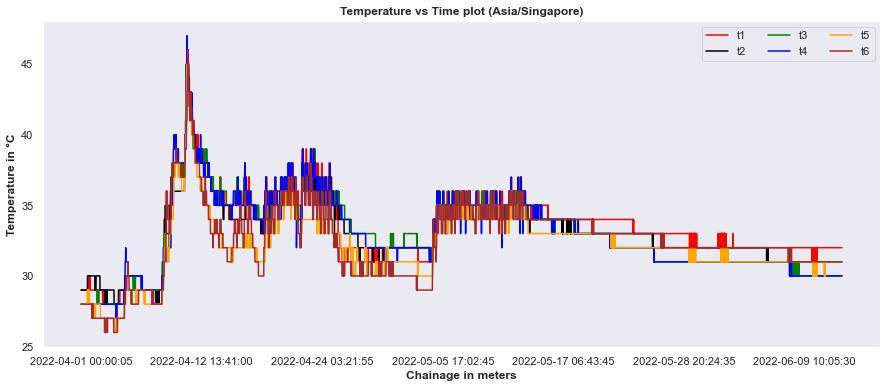

In [179]:
#Combing the 6 Temperature plots together to check consistency
ax = cdf.plot(x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_01', label='t1',color="red")
cdf.plot(ax=ax, x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_02', label='t2',color="black")
cdf.plot(ax=ax, x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_03', label='t3',color="green")
cdf.plot(ax=ax, x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_04', label='t4',color="blue")
cdf.plot(ax=ax, x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_05', label='t5',color="orange")
cdf.plot(ax=ax, x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_06', label='t6',color="brown")
plt.ylabel("Temperature in °C",fontweight='bold')
plt.xlabel("Chainage in meters",fontweight='bold')
plt.title("Temperature vs Time plot (Asia/Singapore)", fontweight="bold")
plt.legend(loc='upper right',ncol=3)
plt.grid()
plt.show()

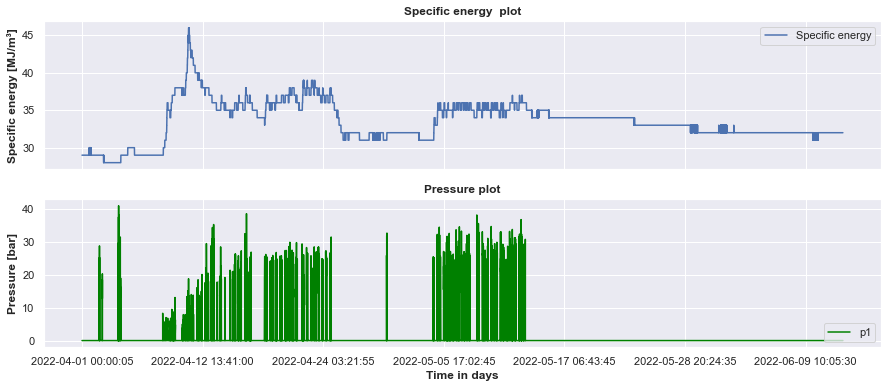

In [180]:
#Creating a supplot between the Advance speed and Temperature
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
         
cdf.plot(ax = axes[0], x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_01', label='Specific energy')
cdf.plot(ax=axes[1], x='ts(Asia/Singapore)',y='QDV_Advance_speed',color="green", label='p1')


axes[0].set_ylabel('Specific energy [MJ/m³]',fontweight='bold')
axes[0].set_title('Specific energy  plot', fontweight="bold")
axes[1].set_ylabel("Pressure [bar]",fontweight='bold')
axes[1].set_xlabel('Time in days',fontweight='bold')
axes[1].set_title('Pressure plot', fontweight="bold")
plt.legend(loc='lower right',ncol=5)

plt.show()

From the subplot, one can see that the days the speed of the TBM is also the days the temperature of the TBM is high.

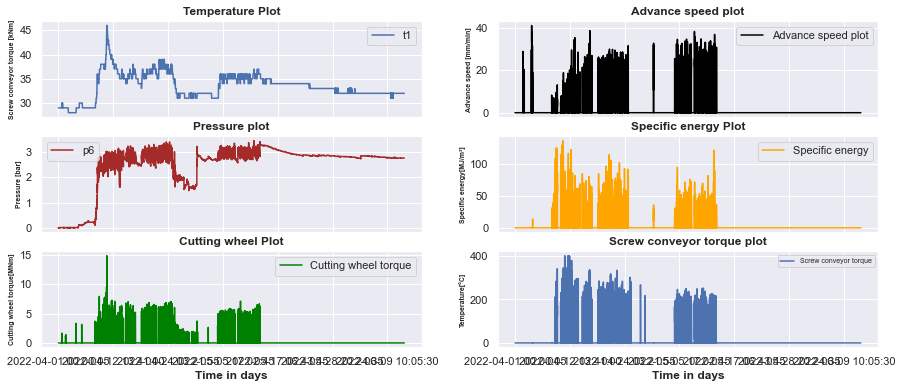

In [182]:
#Combing data from six sensors together to get an in depth information about the subsurface
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True)

cdf.plot(ax=axes[0,0], x='ts(Asia/Singapore)',y='QDV_Bulkhead_temperature_01', label='t1')
cdf.plot(ax = axes[0,1], x='ts(Asia/Singapore)',y='QDV_Advance_speed', color= "black", label='Advance speed plot')
cdf.plot(ax=axes[1,0], x='ts(Asia/Singapore)',y='QDV_Excavation_chamber_pressure_06',color="brown", label='p6')
cdf.plot(ax=axes[1,1], x='ts(Asia/Singapore)',y='QDV_Main_drive_specific_energy',color="orange", label='Specific energy')
cdf.plot(ax=axes[2,0], x='ts(Asia/Singapore)',y='QDV_Main_drive_torque',color="green", label='Cutting wheel torque')
cdf.plot(ax = axes[2,1], x='ts(Asia/Singapore)',y='QDV_Screw_conveyor_torque', label='Screw conveyor torque')


axes[0,0].set_ylabel('Screw conveyor torque [kNm]',fontweight='bold', fontsize= 7)
axes[0,0].set_title('Temperature Plot', fontweight="bold")
axes[0,1].set_ylabel("Advance speed [mm/min]",fontweight='bold', fontsize= 7)
axes[0,1].set_title('Advance speed plot', fontweight="bold")
plt.legend(loc='lower right',ncol=11, fontsize= 7)
axes[1,0].set_ylabel("Pressure [bar]",fontweight='bold', fontsize= 7)
axes[1,0].set_title('Pressure plot', fontweight="bold")
plt.legend(loc='lower right',ncol=11, fontsize= 7)
axes[1,1].set_ylabel("Specific energy[MJ/m³]",fontweight='bold', fontsize= 7)
axes[1,1].set_title('Specific energy Plot', fontweight="bold")
plt.legend(loc='lower right',ncol=11, fontsize= 7)
axes[2,0].set_ylabel("Cutting wheel torque[MNm]",fontweight='bold', fontsize= 7)
axes[2,0].set_xlabel('Time in days',fontweight='bold')
axes[2,0].set_title('Cutting wheel Plot', fontweight="bold")
plt.legend(loc='lower right',ncol=11, fontsize= 7)
axes[2,1].set_ylabel("Temperature[°C]",fontweight='bold', fontsize= 7)
axes[2,1].set_xlabel('Time in days',fontweight='bold')
axes[2,1].set_title('Screw conveyor torque plot', fontweight="bold")
plt.legend(loc='upper right',ncol=11, fontsize= 7)
plt.show()

## Conclusion
From the plots above, the geologic map, and the regional information of the construction site, I was able to write a comprehensive report about the area and even specified the days the workers were not at work and the days the TBM was overheated